In [1]:
!pip install scikit-learn numpy scipy matplotlib pandas jupyter
!git clone https://github.com/TrainingByPackt/Applied-Deep-Learning-with-Keras.git

Cloning into 'Applied-Deep-Learning-with-Keras'...
remote: Enumerating objects: 25768, done.
remote: Total 25768 (delta 0), reused 0 (delta 0), pack-reused 25768
Receiving objects: 100% (25768/25768), 799.81 MiB | 19.16 MiB/s, done.
Resolving deltas: 100% (418/418), done.
Checking out files: 100% (25397/25397), done.


In [2]:
!head data/bank.csv

head: cannot open 'data/bank.csv' for reading: No such file or directory


In [8]:
import pandas as pd

bank_data = pd.read_csv('Applied-Deep-Learning-with-Keras/Lesson01/data/bank.csv',sep=';')

bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [9]:
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [10]:
bank_data.shape

(4521, 17)

In [11]:
feats = bank_data.drop('y', axis=1)
target = bank_data['y']
target

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: object

In [12]:
print(f'Features table has {feats.shape[0]} rows and {feats.shape[1]} columns')
print(f'Taget Table has {target.shape[0]} rows')

Features table has 4521 rows and 16 columns
Taget Table has 4521 rows


In [13]:
!mkdir data

In [15]:
feats.to_csv('data/bank_data_feats.csv')
target.to_csv('data/bank_data_target.csv', header='y')

In [16]:
mat = bank_data.describe()
mat

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [18]:
mat.shape

(8, 7)

In [19]:
bank_data['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

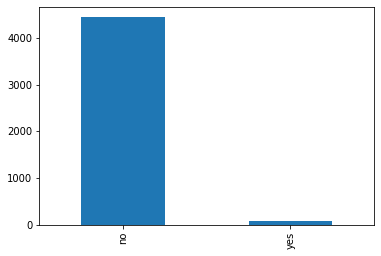

In [20]:
bank_data['default'].value_counts().plot(kind='bar')